### Time Series Analysis
Time Series Forecasting Models are models capable of predicing future values based on previously observed values. They are widely used for Non Stationary Data i.e whose Mean and Standard Devitation are not constant over time

There are four main components of Time Series Analysis:
1. Trend
2. Seasonality
3. Irregularity
4. Cyclic

### Forecasting Model: Prophet

The most commonly used models for forecasting predicitons are usually the autoregressive models, which predict values that are regressed on previous values from the same time series trend. 

However, recently in an attempt to develop a model that could capture seasonality in a time series data, Facebook developed the famous prophet model - which is able to capture daily, weekly and yearly seasonality along with holiday effects, by implementing **additive regression models**.

##### Mathematical Equation behind the Prophet Model

`y(t) = g(t) + s(t) + h(t) + e(t)`

 - g(t) represents the trend. Prophet uses a piecewise linear model for trend forecasting
 - s(t) represents periodic changes (weekly, monthly, yearly)
 - h(t) represents the effects of holidays
 - e(t) is error term

##### Data processing behind the Prophet Model

The prophet model fitting procedure is usually very fast (even for thousands of observations) and it does not require any data pre-processing. It deals with missing data and outliers

### 1. Loading & Understanding Data 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/Users/arnavgupta/Desktop/NUS Fintech Society/2. Time Series Analysis/Stock Price Data.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,31/12/2009,37.068000,37.131000,36.948751,36.998249,36.998249,4892780.4
1,4/01/2010,37.187250,37.394250,37.092751,37.234500,37.234500,7115420.4
2,5/01/2010,37.151249,37.275000,36.780001,37.162500,37.162500,7148180.4
3,6/01/2010,37.218750,37.275000,37.045501,37.133251,37.133251,4610180.4
4,7/01/2010,37.166999,37.263749,36.946500,37.059000,37.059000,4356020.4


In [3]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2265.000000,2265.000000,2265.000000,2265.000000,2265.000000,2.265000e+03
mean,76.733988,77.405088,76.018738,76.740164,76.740164,6.282354e+06
std,29.481122,29.753815,29.145116,29.455220,29.455220,4.761190e+06
min,34.370250,34.462500,33.967500,34.368000,34.368000,9.762504e+05
25%,52.797751,53.164499,52.246498,52.773001,52.773001,3.480140e+06
50%,71.799001,72.456000,70.980001,71.781000,71.781000,4.931120e+06
75%,91.122002,91.932003,90.636001,91.238999,91.238999,7.561460e+06
max,164.499000,165.471002,163.518004,164.786993,164.786993,5.810654e+07


Over the past 8 years, the mean closing price has been SGD 76.74, with Standard Deviation being about SGD 29.46

### 2. Model Preparation 

In [4]:
df = df[["Date", "Close"]]
df = df.rename(columns = {"Date":"ds", "Close":"y"})
df.head()
#These column names are needed for model fitting

,ds,y
0,31/12/2009,36.998249
1,4/01/2010,37.234500
2,5/01/2010,37.162500
3,6/01/2010,37.133251
4,7/01/2010,37.059000


In [5]:
from fbprophet import Prophet
from matplotlib import pyplot as plt
from matplotlib.dates import MonthLocator, num2date
from matplotlib.ticker import FuncFormatter

m = Prophet(daily_seasonality = True)
m.fit(df)

Importing plotly failed. Interactive plots will not work.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


### 3. Model Forecasting

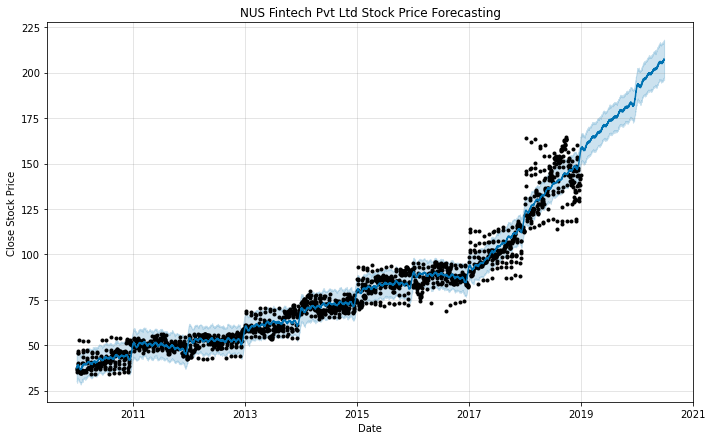

In [6]:
future = m.make_future_dataframe(periods=545)
prediction = m.predict(future)
m.plot(prediction)

plt.title("NUS Fintech Pvt Ltd Stock Price Forecasting")
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()

In [7]:
prediction.to_excel("my_submission_31.0.xlsx") #extracting out the results

### 4. Advanced Model Visualization

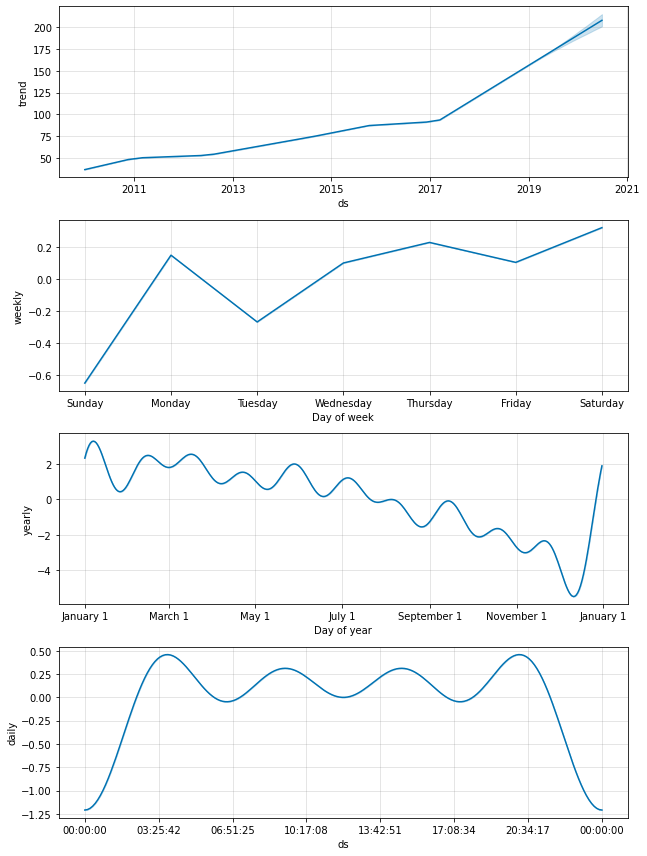

In [8]:
m.plot_components(prediction)
plt.show()

Based on the estimated trends, we can see that usually the stock price is maximum in **early january** (see third subplot) and mostly on Wednesday & Thursdays (see second subplot). Finally, the first subplot depicts an increase of the stock price in the near future (between January 2019 and May 2020).